In [4]:
import requests
import seaborn as sns
import json
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

In [9]:
# Adventure Walk 2024 - 50 km
base_url = 'https://my1.raceresult.com/266144/RRPublish/data/list?key=cbb56f3829f252176e762b342c83e242&listname=Ergebnislisten%7CErgebnisliste%20-%2050k&page=results&contest=0&r=all&l=0'

# Adventure Walk 2024 - 30 km
# base_url = 'https://my1.raceresult.com/266144/RRPublish/data/list?key=cbb56f3829f252176e762b342c83e242&listname=Ergebnislisten%7CErgebnisliste%20-%2025k&page=results&contest=0&r=all&l=0'
response = requests.get(f"{base_url}")

In [10]:
data = json.loads(response.text)

In [11]:
idx_starter_id = 0
idx_name = 1
idx_time = 2

df = pd.concat([
    pd.DataFrame(values, columns=['id', 'name', 'time', 'misc']) for _, values in list(data['data'].values())[0].items()
]).reset_index(drop=True).assign(time=lambda df: pd.to_timedelta(df['time']), seconds=lambda df: df['time'].dt.total_seconds())

In [12]:
def seconds_to_mhs(sec: int) -> str:
    return f"{sec // 3600:02.0f}:{(sec % 3600) // 60:02.0f}:{(sec % 3600) % 60:02.0f}"


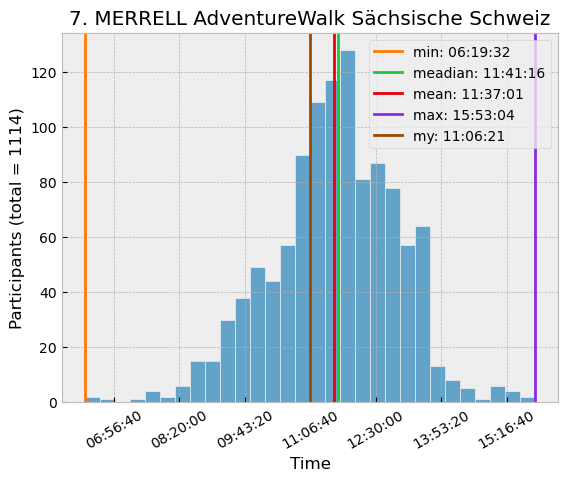

In [13]:

with plt.style.context("bmh"):
    sns.histplot(
        data=df,
        x='seconds',
    )

    palette = sns.color_palette("bright")
    for i, (prefix, value) in enumerate(dict({
        "min": df['seconds'].min(),
        "meadian": df['seconds'].median(),
        "mean": df['seconds'].mean(),
        "max": df['seconds'].max(),
        "my": df.query("name.str.contains('Stanley')").iloc[0]['seconds'],
    }).items()):
        plt.axvline(
            value,
            label=f"{prefix}: {seconds_to_mhs(value)}",
            color=palette[1+i],
        )
    ax = plt.gca()
    ax.tick_params(axis='x', labelrotation=30)
    ax.xaxis.set_major_formatter(FuncFormatter(func=lambda x, pos: seconds_to_mhs(x)))
    plt.xlabel("Time")
    plt.ylabel(f"Participants (total = {len(df)})")
    plt.title(f"{data['list']['HeadLine1']}")

    plt.legend()
    plt.show()